# Exercise 4.10 Coding Etiquette & Excel Reporting 1.A


# Table of contents:

# Part 1

Question#6: (Continued): Create an appropriate visualization to show the distribution of profiles.

Question#7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

Question#8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

Question#9: Produce suitable charts to illustrate your results and export them in your project folder.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign path
path = r'C:\Users\djval\Google Drive\Career\Career Foundry\Data Immerson\Achievement 4\10-2021 Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\djval\\Google Drive\\Career\\Career Foundry\\Data Immerson\\Achievement 4\\10-2021 Instacart Basket Analysis'

In [4]:
# Import latest exported data set 
df_ords_prods_cust_merged_3 = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merged_7.pkl'))

In [5]:
df_ords_prods_cust_merged_3.shape

(32434212, 39)

In [6]:
df_ords_prods_cust_merged_3.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,...,income,region,exclusion_flag,age_group,income_range,parental_status,weekday,part_of_day,selling_performance,price_range
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,...,98119,West,non low activity customer,51-60,080000-120000,parent,Thursday,Morning,Currently not assigned,other
1,104690,33120,2,1,202279,8,6,10,30.0,Organic Egg Whites,...,98119,West,non low activity customer,51-60,080000-120000,parent,Friday,Morning,Currently not assigned,other
2,132412,33120,1,1,202279,6,5,9,30.0,Organic Egg Whites,...,98119,West,non low activity customer,51-60,080000-120000,parent,Thursday,Morning,Currently not assigned,other
3,2808715,33120,1,1,202279,5,5,13,9.0,Organic Egg Whites,...,98119,West,non low activity customer,51-60,080000-120000,parent,Thursday,Afternoon,Currently not assigned,other
4,2894949,33120,5,0,202279,1,5,9,3.0,Organic Egg Whites,...,98119,West,non low activity customer,51-60,080000-120000,parent,Thursday,Morning,Currently not assigned,other


In [7]:
# Create subset without outliers
df_ords_prods_cust_merged_4 = df_ords_prods_cust_merged_3[df_ords_prods_cust_merged_3['price_range']=='other']

In [8]:
# Check results to make sure no outliers are present
df_ords_prods_cust_merged_4['price_range'].value_counts()

other    32429085
Name: price_range, dtype: int64

I need to create departmnet names column

In [9]:
# Import department data 
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [10]:
df_dep.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [11]:
# Transpose the table
df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [12]:
# Creating new column for department names 


df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 1, 'department_name'] = 'frozen'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 2, 'department_name'] = 'other'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 3, 'department_name'] = 'bakery'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 4, 'department_name'] = 'produce'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 5, 'department_name'] = 'alcohol'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 6, 'department_name'] = 'international'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 7, 'department_name'] = 'beverages'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 8, 'department_name'] = 'pets'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 9, 'department_name'] = 'dry goods pasta'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 10, 'department_name'] = 'bulk'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 11, 'department_name'] = 'personal care'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 12, 'department_name'] = 'meat seafood'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 13, 'department_name'] = 'pantry'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 14, 'department_name'] = 'breakfast'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 15, 'department_name'] = 'canned goods'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 16, 'department_name'] = 'dairy eggs'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 17, 'department_name'] = 'households'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 18, 'department_name'] = 'babies'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 19, 'department_name'] = 'snacks'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 20, 'department_name'] = 'deli'
df_ords_prods_cust_merged_4.loc[df_ords_prods_cust_merged_4['department_id'] == 21, 'department_name'] = 'missing'

C:\Users\djval\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\djval\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\djval\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

C:\Users\djval\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
# Checking the department column 
df_ords_prods_cust_merged_4['department_name'].value_counts()

produce            9479291
dairy eggs         5408889
snacks             2887550
beverages          2688159
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
households          738666
breakfast           710647
meat seafood        708931
personal care       447691
babies              423802
international       269253
alcohol             153743
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: department_name, dtype: int64

In [14]:
df_ords_prods_cust_merged_4.dtypes

order_id                            int64
product_id                          int64
add_to_cart_order                   int64
reordered                           int64
user_id                            object
order_number                        int64
orders_day_of_week                  int64
order_hour_of_day                   int64
days_since_prior_order            float64
product_name                       object
aisle_id                            int64
department_id                       int64
prices                            float64
_merge                           category
price_range_loc                    object
busiest_days                       object
orders_per_time_period             object
max_order                           int64
loyalty_flag                       object
avg_spend_per_customer_id         float64
spending_flag                      object
median_days_since_prior_order     float64
frequency_flag                     object
gender                            

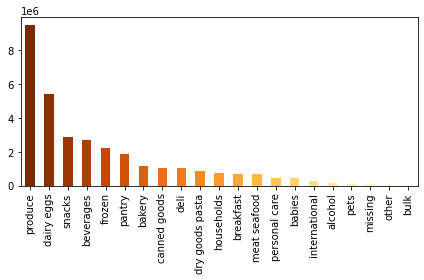

In [266]:
# Create visual to show what departments sell the most
bar_top_selling_departments = df_ords_prods_cust_merged_4['department_name'].value_counts().plot.bar(color = sns.color_palette('YlOrBr_r', 21))
plt.tight_layout()

In [267]:
# Export top selling departments
bar_top_selling_departments.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','top_selling_departments.png'))

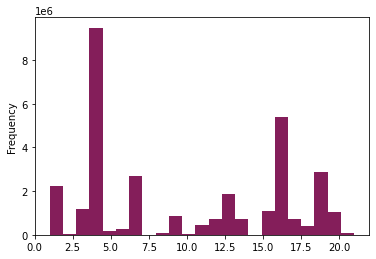

In [17]:
# Histogram showing highest frequency of product orders by department id
hist = df_ords_prods_cust_merged_4['department_id'].plot.hist(bins = 23, color = sns.color_palette('rocket',2))

In [316]:
# Export highest frequency of product orders by department id
hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist.png'))

In [18]:
# Show department name and department id as reference for above visualization
df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [19]:
# Export department orders hist
hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_orders_hist.png'))

The top 5 selling departments are produce, dairy eggs, beverages,frozen, and pantry. I will check to see the % of sales these 5 departments make up of the total sales by department. 

In [20]:
# Check to see how much sales the top departments make up out of totals sales
dept_sales = df_ords_prods_cust_merged_4.groupby('department_name').agg({'prices': ['sum']})

In [21]:
dept_sales.to_clipboard()

In [22]:
dept_sales

,prices
,sum
department_name,
alcohol,1.252146e+06
babies,3.237161e+06
bakery,9.255103e+06
beverages,2.064660e+07
breakfast,5.731696e+06
bulk,2.886486e+05
canned goods,8.053132e+06
dairy eggs,4.517484e+07


The top 5 selling departments (produce, dairy eggs, beverages,frozen, and pantry) make up 69% of total sales. I will create a subset to analyze these departments vs customer profiles in order to pin point more-relevant marketing strategies. These 5 deparments will be flagged as "High performing dept."

In [23]:
# Write for loop to flag 

result = []

for value in df_ords_prods_cust_merged_4['department_id']:
    if value == 4:
        result.append('High performing dept')
    elif value == 16:
        result.append('High performing dept')
    elif value == 7:
        result.append('High performing dept')
    elif value == 1:
        result.append('High performing dept')
    elif value == 13:
        result.append('High performing dept')
    else:
        result.append('Normal performing dept')

In [24]:
result

['High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'Normal performing dept',
 'High performing dept'

In [25]:
# Create new column 
df_ords_prods_cust_merged_4['department_perf'] = result

<ipython-input-25-80b501bffc3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_cust_merged_4['department_perf'] = result


In [26]:
# Check new column 
df_ords_prods_cust_merged_4['department_perf'].value_counts()

High performing dept      21688348
Normal performing dept    10740737
Name: department_perf, dtype: int64

In [27]:
# Create subset with only high performing departments
df_ords_prods_cust_merged_5 = df_ords_prods_cust_merged_4[df_ords_prods_cust_merged_4['department_perf']=='High performing dept']

In [28]:
# Check results to make sure no normal performers are present
df_ords_prods_cust_merged_5['department_perf'].value_counts()

High performing dept    21688348
Name: department_perf, dtype: int64

Text(108.68, 0.5, '')

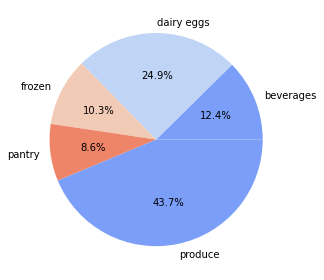

In [29]:
# Check to see % of sales each department eqals out of the top 5 departments.
pie_department_name = df_ords_prods_cust_merged_5['department_name'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('coolwarm', 4))
plt.tight_layout()
plt.ylabel('')

I will use these top 5 departments in order to pinpoint customers to target for product marketing campaings. 

In [271]:
# Export  % of sales each department eqals out of the top 5 departments.
pie_department_name.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','pie_department_name.png'))

# Age

# Key questions #5.E: What different classifications does the demographic information suggest? Age & certain types of goods?

In [30]:
# Crosstab for department name and age group for visualization (cdertain types of goods)
dept_name_age = pd.crosstab(df_ords_prods_cust_merged_5['department_name'], df_ords_prods_cust_merged_5['age_group'], dropna = False)

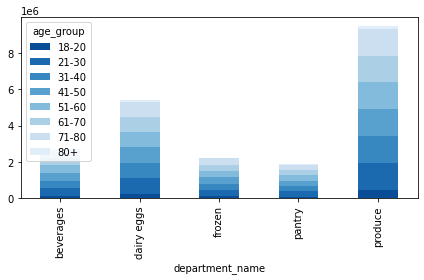

In [295]:
bar_dept_name_age = dept_name_age.plot.bar(stacked = True, color = sns.color_palette('Blues_r', 8))
plt.legend(title = 'age_group', loc='upper left')
plt.tight_layout()

There is not a lot of difference from amount of the top selling departments purchase by each age group. 18-10 and 80+ can be excluded from marketing strategies.

In [296]:
# Export department orders and age
bar_dept_name_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_name_age.png'))

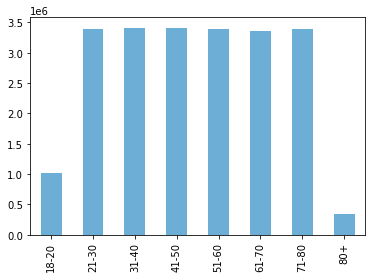

In [33]:
# total orders per age group
bar_age_group_orders = df_ords_prods_cust_merged_5['age_group'].value_counts().sort_index().plot.bar(color = sns.color_palette('Blues_r', 1))

Total orders by age groups indicate the same information.18-10 and 80+ can be excluded from marketing strategies.

In [34]:
# Export total orders per age group
bar_age_group_orders.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_group_orders.png'))

In [317]:
# Crosstab for age group and weekday
age_weekday = pd.crosstab(df_ords_prods_cust_merged_5['weekday'], df_ords_prods_cust_merged_5['age_group'], dropna = False)

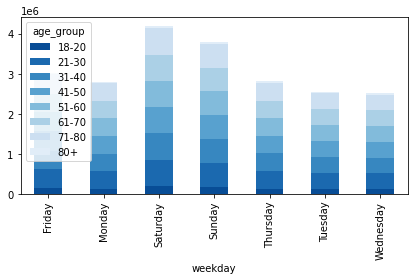

In [318]:
bar_age_weekday = age_weekday.plot.bar(stacked = True, color = sns.color_palette('Blues_r', 8))
plt.legend(title = 'age_group', loc='upper left')
plt.tight_layout()

In [319]:
# Export age group and weekday
bar_age_weekday.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_weekday.png'))

# Key questions #5.E: The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example: Is there a connection between age and family status in terms of ordering habits?

In [86]:
# Crosstab for age and department name
age_department = pd.crosstab(df_ords_prods_cust_merged_4['department_name'], df_ords_prods_cust_merged_4['age_group'], dropna = False)

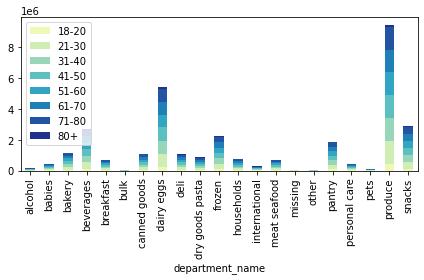

In [284]:
# Create visual for age and department name
bar_age_department = age_department.plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGnBu', 8))
plt.legend(loc='upper left')
plt.tight_layout()

In [285]:
# Export age and department name
bar_age_department.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_age_department.png'))

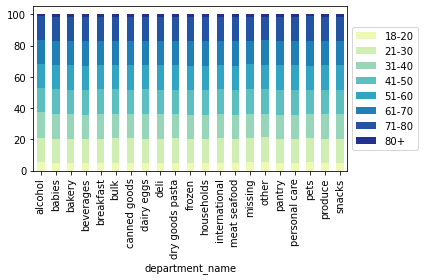

In [286]:
# 100% stacked bar chart 
bar_age_department_100 = age_department.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGnBu',8))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [287]:
# Export age and department name stacked
bar_age_department_100.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_age_department_100.png'))

In [98]:
# Crosstab for family status and department 
family_status_department = pd.crosstab(df_ords_prods_cust_merged_4['department_name'], df_ords_prods_cust_merged_4['fam_status'], dropna = False)

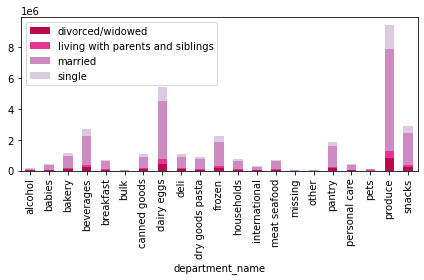

In [288]:
# Create visual for family status and department name
bar_family_status_department = family_status_department.sort_index().plot(kind = 'bar', stacked = True, color = sns.color_palette('PuRd_r', 4))
plt.legend(loc='upper left')
plt.tight_layout()

In [289]:
# Export family status and department name
bar_family_status_department.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_status_department.png'))

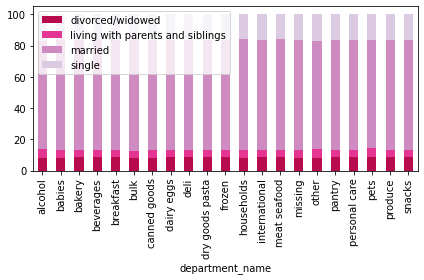

In [291]:
# 100% stacked bar chart
bar_family_status_department_100 = family_status_department.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('PuRd_r', 4))
plt.legend(loc='upper left')
plt.tight_layout()

In [292]:
# Export family status and department name stacked 
bar_family_status_department_100.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_status_department_100.png'))

There is no connection between age and family status that impacts ordering habits. 

# Income

# Key questions #5.E: What different classifications does the demographic information suggest? Income & certain types of goods?

In [35]:
# Crosstab for department name and income for visualization
dept_name_income = pd.crosstab(df_ords_prods_cust_merged_5['department_name'], df_ords_prods_cust_merged_5['income_range'], dropna = False)

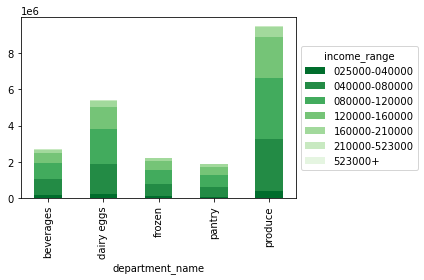

In [297]:
bar_dept_name_income = dept_name_income.plot.bar(stacked = True, color = sns.color_palette('Greens_r', 7))
plt.legend(title = 'income_range',loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

Customers in the imcome range of $40k - $160k should be target customers. 

In [298]:
# Export department name and income for visualization
bar_dept_name_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dept_name_income.png'))

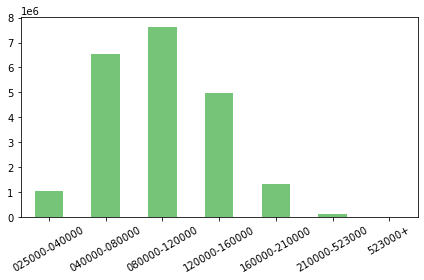

In [38]:
# total orders per age group
orders_income = df_ords_prods_cust_merged_5['income_range'].value_counts().sort_index().plot.bar(color = sns.color_palette('Greens_r', 1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

Total by orders indicate the same information. Customers in the imcome range of  40𝑘− 160k should be target customers.

In [39]:
# Export total orders per age group
orders_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_income.png'))

# Key questions #5.E: What different classifications does the demographic information suggest? Family status & certain types of goods?

In [40]:
# Crosstab for department name and family status for visualization
dept_name_dependants = pd.crosstab(df_ords_prods_cust_merged_5['department_name'], df_ords_prods_cust_merged_5['fam_status'], dropna = False)

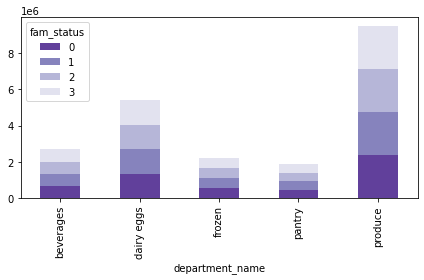

In [299]:
bar_dept_name_dependants = dept_name_dependants.plot.bar(stacked = True, color = sns.color_palette('Purples_r', 4))
plt.legend(title = 'fam_status',loc='upper left')
plt.tight_layout()

In [300]:
# Export department name and family status
bar_dept_name_dependants.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dept_name_dependant.png'))

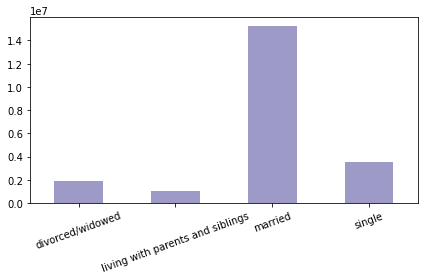

In [43]:
# total orders by family status 
orders_family_status = df_ords_prods_cust_merged_5['fam_status'].value_counts().sort_index().plot.bar(color = sns.color_palette('Purples', 1))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

Married customers should be targeted for major marketing strategies for all top selling departments. 

In [44]:
# Export total orders by family status 
orders_family_status.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_family_status.png'))

In [45]:
# Crosstab for department name and family status for visualization
dept_name_dependants = pd.crosstab(df_ords_prods_cust_merged_5['department_name'], df_ords_prods_cust_merged_5['number_of_dependants'], dropna = False)

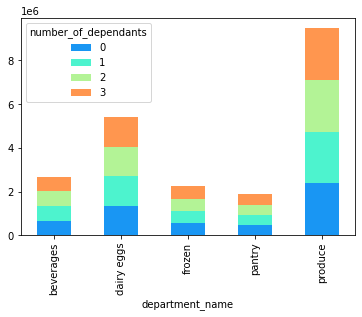

In [59]:
bar_dept_name_dependants = dept_name_dependants.plot.bar(stacked = True, color = sns.color_palette('rainbow', 4))
plt.legend(title = 'number_of_dependants',loc='upper left')

In [62]:
# Export department name and family status
bar_dept_name_dependants.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_name_dependants.png'))

# order hour of day and orders day of the week

# Key question #1: The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

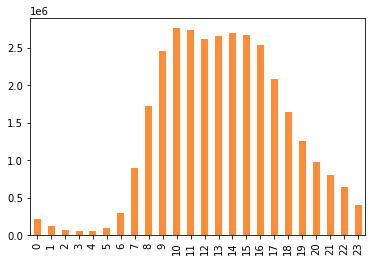

In [127]:
# Busiest hours of the day
bar_busiest_hour = df_ords_prods_cust_merged_4['order_hour_of_day'].value_counts().sort_index().plot.bar(color = sns.color_palette('Oranges', 1))

In [128]:
# Export busiest hours of the day
bar_busiest_hour.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_busiest_hour.png'))

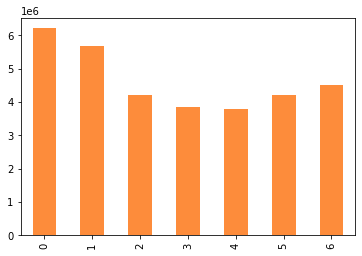

In [132]:
# Busiest day of the week
bar_busiest_day_of_week = df_ords_prods_cust_merged_4['orders_day_of_week'].value_counts().sort_index().plot.bar(color = sns.color_palette('Oranges', 1))

In [133]:
# Export busiest day of week
bar_busiest_day_of_week.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','busiest_day_of_week.png'))

# They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

In [135]:
# Mean price per hour
prices_hour = df_ords_prods_cust_merged_4.groupby('order_hour_of_day').agg({'prices': ['mean']})

Text(0, 0.5, 'mean_price')

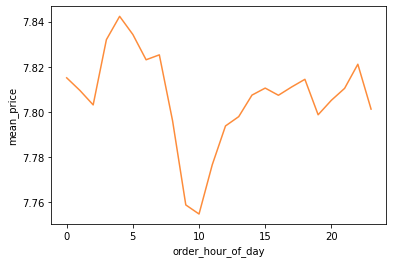

In [155]:
# Create a line chart of mean prices per hour of the day 
mean_price_line_chart_hour = prices_hour.plot.line(legend = False,color = sns.color_palette('Oranges',1))
plt.ylabel('mean_price')

In [156]:
# Export mean price per hour
mean_price_line_chart_hour.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_hour.png'))

In [144]:
# Mean price per weekday
prices_weekday = df_ords_prods_cust_merged_4.groupby('weekday').agg({'prices': ['mean']})

Text(0, 0.5, 'mean_price')

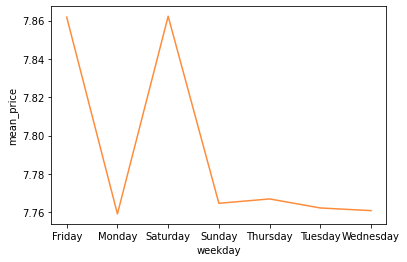

In [149]:
# Create a line chart of mean prices per weekday
mean_price_line_chart_weekday = prices_weekday.plot.line(legend = False, color = sns.color_palette('Oranges', 1))
plt.ylabel('mean_price')

In [157]:
# Export mean price per weekday
mean_price_line_chart_weekday.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_weekday.png'))

In [47]:
# Crosstab for department name and for part of the day visualization
dept_name_part_day = pd.crosstab(df_ords_prods_cust_merged_5['department_name'], df_ords_prods_cust_merged_5['part_of_day'], dropna = False)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'beverages'),
  Text(1, 0, 'dairy eggs'),
  Text(2, 0, 'frozen'),
  Text(3, 0, 'pantry'),
  Text(4, 0, 'produce')])

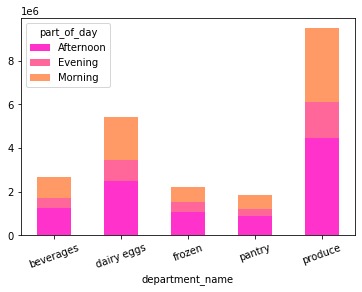

In [261]:
bar_dept_name_part_day = dept_name_part_day.plot.bar(stacked = True, color = sns.color_palette('spring', 4))
plt.legend(title = 'part_of_day',loc='upper left')
plt.xticks(rotation= 20, horizontalalignment="center")

In [263]:
# Export department name and for part of the day
bar_dept_name_part_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_name_part_day.png'))

In [49]:
# Crosstab for department name and weekday visualization
dept_name_weekday = pd.crosstab(df_ords_prods_cust_merged_5['department_name'], df_ords_prods_cust_merged_5['weekday'], dropna = False)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'beverages'),
  Text(1, 0, 'dairy eggs'),
  Text(2, 0, 'frozen'),
  Text(3, 0, 'pantry'),
  Text(4, 0, 'produce')])

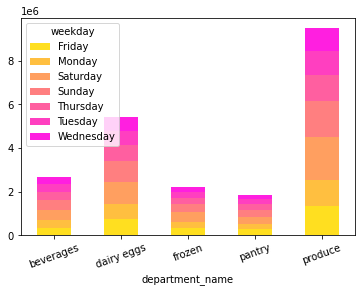

In [262]:
bar_dept_name_weekday = dept_name_weekday.plot.bar(stacked = True, color  = sns.color_palette('spring_r', 7))
plt.legend(title = 'weekday',loc='upper left')
plt.xticks(rotation= 20, horizontalalignment="center")

In [264]:
# Export department name and weekday
bar_dept_name_weekday.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_name_weekday.png'))

# parental status

# Key question #5.F: What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

In [51]:
# Crosstab for department name and parental status visualization
dept_name_parental_status = pd.crosstab(df_ords_prods_cust_merged_5['department_name'], df_ords_prods_cust_merged_5['parental_status'], dropna = False)

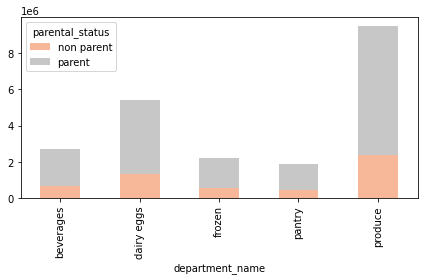

In [304]:
bar_dept_name_parental_status = dept_name_parental_status.plot.bar(stacked = True, color = sns.color_palette('RdGy', 2))
plt.legend(title = 'parental_status',loc='upper left')
plt.tight_layout()

In [305]:
# Export department name and parental status visualization
bar_dept_name_parental_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_name_parental_status.png'))

In [53]:
# Crosstab for weekday and parental status visualization
dept_name_parental_status_weekday = pd.crosstab(df_ords_prods_cust_merged_5['weekday'], df_ords_prods_cust_merged_5['parental_status'], dropna = False)

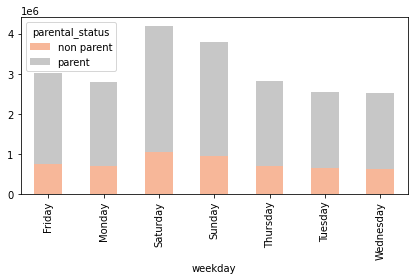

In [306]:
bar_dept_name_parental_status_weekday = dept_name_parental_status_weekday.plot.bar(stacked = True, color = sns.color_palette('RdGy', 2))
plt.legend(title = 'parental_status',loc='upper left')
plt.tight_layout()

In [307]:
# Export weekday and parental status
bar_dept_name_parental_status_weekday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_name_parental_status_weekday.png'))

In [249]:
# crosstab age and spending flag
age_spending = pd.crosstab(df_ords_prods_cust_merged_4['age_group'], df_ords_prods_cust_merged_4['spending_flag'], dropna = False)

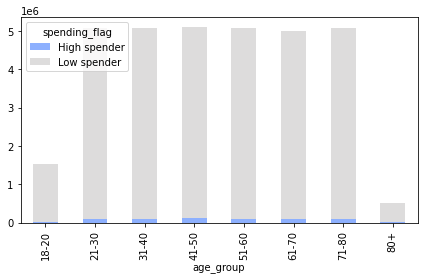

In [312]:
# bar chart age and spending flag
bar_age_spending = age_spending.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm',3))
plt.legend(title = 'spending_flag',loc='upper left')
plt.tight_layout()

In [313]:
# Export age and spending flag
bar_age_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_spending.png'))

In [255]:
# crosstab number of dependants and spending flag
number_of_dependants_spending_flag = pd.crosstab(df_ords_prods_cust_merged_4['number_of_dependants'], df_ords_prods_cust_merged_4['spending_flag'], dropna = False)

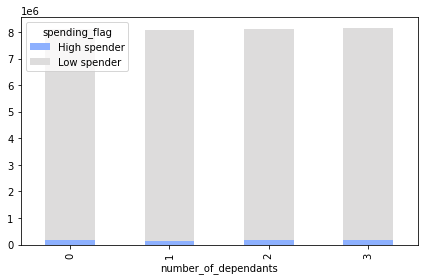

In [314]:
# bar chart number of dependants and spending flag
bar_number_of_dependants_spending_flag  = number_of_dependants_spending_flag .plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm',3))
plt.legend(title = 'spending_flag',loc='upper left')
plt.tight_layout()

In [315]:
# Export number of dependants and spending flag
bar_number_of_dependants_spending_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'number_of_dependants_spending_flag.png'))

# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [168]:
# aggregating age + prices
agg_age_price = df_ords_prods_cust_merged_4.groupby('age').agg({'prices' : ['min', 'mean', 'max']})

In [169]:
agg_age_price.to_clipboard()

In [171]:
# aggregating age + order number
agg_age_order_number = df_ords_prods_cust_merged_4.groupby('age').agg({'order_number' : ['min', 'mean', 'max']})

In [173]:
agg_age_order_number.to_clipboard()

In [175]:
# aggregating income range + prices
agg_income_range_price = df_ords_prods_cust_merged_4.groupby('income_range').agg({'prices' : ['min', 'mean', 'max']})

In [176]:
agg_income_range_price.to_clipboard()

In [177]:
# aggregating income range + prices
agg_income_range_order_number = df_ords_prods_cust_merged_4.groupby('income_range').agg({'order_number' : ['min', 'mean', 'max']})

In [178]:
agg_income_range_order_number.to_clipboard()

In [179]:
# aggregating fam status + prices
agg_fam_status_price = df_ords_prods_cust_merged_4.groupby('fam_status').agg({'prices' : ['min', 'mean', 'max']})

In [180]:
agg_fam_status_price.to_clipboard()

In [181]:
# aggregating fam status + order number
agg_fam_status_order_number = df_ords_prods_cust_merged_4.groupby('fam_status').agg({'order_number' : ['min', 'mean', 'max']})

In [182]:
agg_fam_status_order_number.to_clipboard()

In [183]:
# aggregating # of dependants + prices
agg_number_of_dependants_price = df_ords_prods_cust_merged_4.groupby('number_of_dependants').agg({'prices' : ['min', 'mean', 'max']})

In [184]:
agg_number_of_dependants_price.to_clipboard()

In [185]:
# aggregating # of dependants + order numbers
agg_number_of_dependants_order_number = df_ords_prods_cust_merged_4.groupby('number_of_dependants').agg({'order_number' : ['min', 'mean', 'max']})

In [186]:
agg_number_of_dependants_order_number.to_clipboard()

In [187]:
# aggregating parental status+ prices
agg_parental_status_price = df_ords_prods_cust_merged_4.groupby('parental_status').agg({'prices' : ['min', 'mean', 'max']})

In [188]:
agg_parental_status_priceagg_parental_status_order_number

In [189]:
# aggregating parental status+ order numbers
agg_parental_status_order_number = df_ords_prods_cust_merged_4.groupby('parental_status').agg({'order_number' : ['min', 'mean', 'max']})

In [191]:
agg_parental_status_order_number.to_clipboard()

# Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

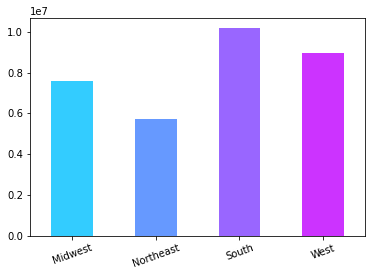

In [200]:
# show how customers distributed across regions
region_bar = df_ords_prods_cust_merged_4['region'].value_counts().sort_index().plot.bar(color = sns.color_palette('cool', 4))
plt.xticks(rotation= 20, horizontalalignment="center")

In [201]:
# Export how customers distributed across regions
region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_bar.png'))

# Key question #5.C:The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example: Are there differences in ordering habits based on a customer’s region?

In [205]:
# crosstab ordering habits based on a customer’s region
department_region = pd.crosstab(df_ords_prods_cust_merged_4['department_name'], df_ords_prods_cust_merged_4['region'], dropna = False)

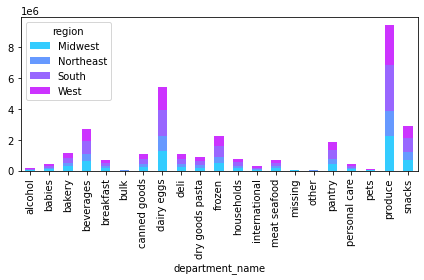

In [277]:
# bar chart ordering habits based on a customer’s region
bar_department_region = department_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('cool', 4))
plt.tight_layout()

In [278]:
# Export ordering habits based on a customer’s region
bar_department_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_region.png'))

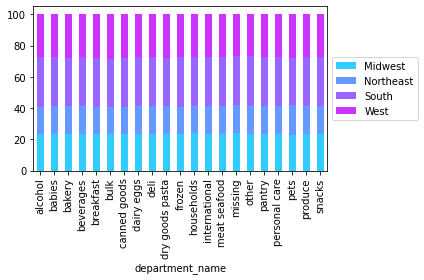

In [279]:
# 100% stacked bar chart 

bar_department_region_100 = department_region .apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('cool', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [280]:
# Export ordering habits based on a customer’s region stacked bar chart
bar_department_region_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_region_100.png'))

In [215]:
# Crosstab for age and region
age_region = pd.crosstab(df_ords_prods_cust_merged_4['age_group'], df_ords_prods_cust_merged_4['region'], dropna = False)

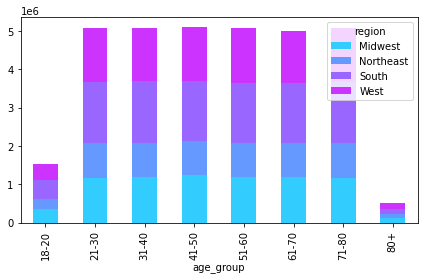

In [281]:
# bar chart for age and region
bar_age_region = age_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('cool', 4))
plt.tight_layout()

In [217]:
# Export age and region bar chart
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region.png'))

In [218]:
# Crosstab for income and region
income_region = pd.crosstab(df_ords_prods_cust_merged_4['income_range'], df_ords_prods_cust_merged_4['region'], dropna = False)

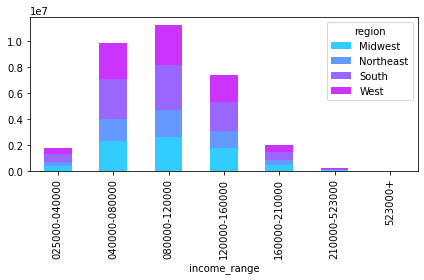

In [282]:
# bar chart for income and region
bar_income_region = income_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('cool', 4))
plt.tight_layout()

In [283]:
# Export income and region bar chart
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_region.png'))

# Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

Text(0, 0.5, '')

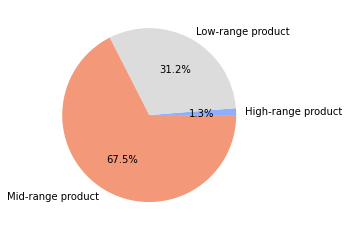

In [227]:
# show simpler price range groupings
pie_time_product_price = df_ords_prods_cust_merged_4['price_range_loc'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('coolwarm', 3))
plt.ylabel('')

In [230]:
# Export price range groupings
pie_time_product_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_time_product_price.png'))

In [232]:
# crosstab of departments and price ranges of top selling departments
departments_price_range = pd.crosstab(df_ords_prods_cust_merged_5['department_name'], df_ords_prods_cust_merged_5['price_range_loc'], dropna = False)

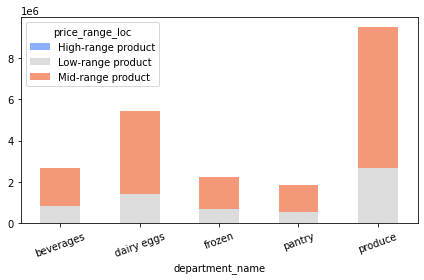

In [234]:
# bar chart departments and price ranges
bar_departments_price_range = departments_price_range.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm', 3))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [235]:
# Export departments and price ranges of top selling departments
bar_departments_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_departments_price_range.png'))

In [236]:
# crosstab of spedning flag and price ranges
spending_flag_price_range = pd.crosstab(df_ords_prods_cust_merged_5['spending_flag'], df_ords_prods_cust_merged_5['price_range_loc'], dropna = False)

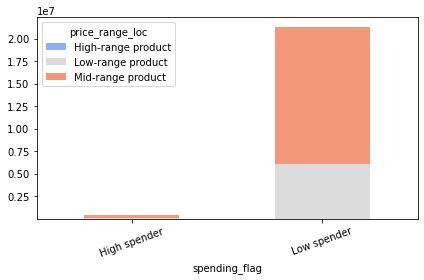

In [237]:
# bar chart spending flag and price ranges
spending_flag_price_range = spending_flag_price_range.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm', 3))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [238]:
# Export spending flag and price ranges
spending_flag_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_flag_price_range.png'))

# Additional key questions

# Key questions #5.A: The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example: What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

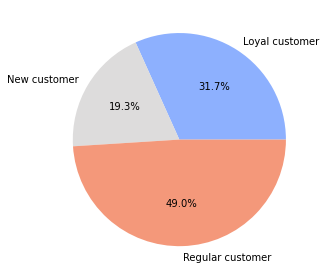

In [240]:
# distribution among customers in regards to brand loyalty 
loyalty_pie = df_ords_prods_cust_merged_4['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('coolwarm',3))
plt.ylabel('')
plt.tight_layout()

In [247]:
# Export customers in regards to brand loyalty 
loyalty_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_pie.png'))

# The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example: Are there differences in ordering habits based on a customer’s loyalty status?

In [274]:
# crosstab loyalty status and spending flag
frequency_flag_loyalty_status = pd.crosstab(df_ords_prods_cust_merged_4['frequency_flag'], df_ords_prods_cust_merged_4['loyalty_flag'], dropna = False)

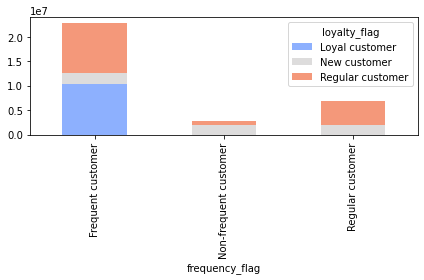

In [275]:
# bar chart loyalty status and spending flag
bar_frequency_flag_loyalty_status = frequency_flag_loyalty_status.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm',3))
plt.tight_layout()

In [276]:
# Export loyalty status and spending flag
bar_frequency_flag_loyalty_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_flag_loyalty_status.png'))

In [258]:
# export most recent data frame
df_ords_prods_cust_merged_4.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merged_8.pkl'))

In [268]:
# Create a subset data set with only top 25 items
df_top_25_selling_items = df_ords_prods_cust_merged_4[df_ords_prods_cust_merged_4['selling_performance']=='Top 25 selling product']

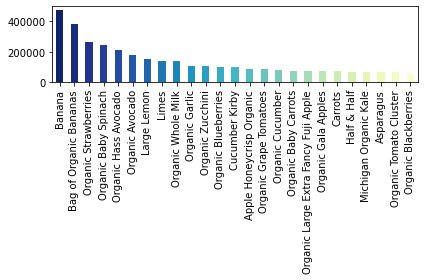

In [269]:
# Create top 25 selling items bar chart
bar_top_25_selling_items = df_top_25_selling_items['product_name'].value_counts().plot.bar(color = sns.color_palette('YlGnBu_r', 25))
plt.tight_layout()

In [323]:
# crosstab gender and order
gender_order_number = pd.crosstab(df_ords_prods_cust_merged_4['gender'], df_ords_prods_cust_merged_4['frequency_flag'], dropna = False)

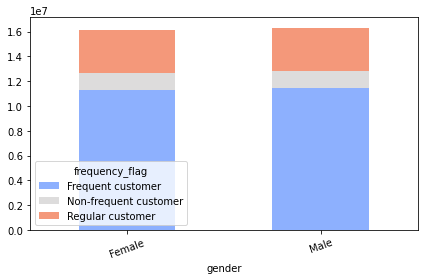

In [324]:
# Create gender and order
bar_gender_order_number = gender_order_number.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm', 3))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [325]:
# Export gender and order
bar_gender_order_number.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_gender_order_number .png'))

In [270]:
# Export top 25 selling items
bar_top_25_selling_items.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','top_25_selling_items.png'))

In [ ]:
# Export latest note book
df_ords_prods_cust_merged_5.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merged_8.pkl'))